In [1]:
import pandas as pd
df = pd.read_csv('end-part2_df.csv').set_index('date')

In [2]:
df.corr()[['meantempm']].sort_values('meantempm')

,meantempm
maxpressurem_1,-0.519699
maxpressurem_2,-0.425666
maxpressurem_3,-0.408902
meanpressurem_1,-0.365682
meanpressurem_2,-0.269896
meanpressurem_3,-0.263008
minpressurem_1,-0.201003
minhumidity_1,-0.148602
minhumidity_2,-0.143211
minhumidity_3,-0.118564


In [3]:
predictors = ['meantempm_1',  'meantempm_2',  'meantempm_3', 
              'mintempm_1',   'mintempm_2',   'mintempm_3',
              'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
              'maxdewptm_1',  'maxdewptm_2',  'maxdewptm_3',
              'mindewptm_1',  'mindewptm_2',  'mindewptm_3',
              'maxtempm_1',   'maxtempm_2',   'maxtempm_3']
df2 = df[['meantempm'] + predictors]

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

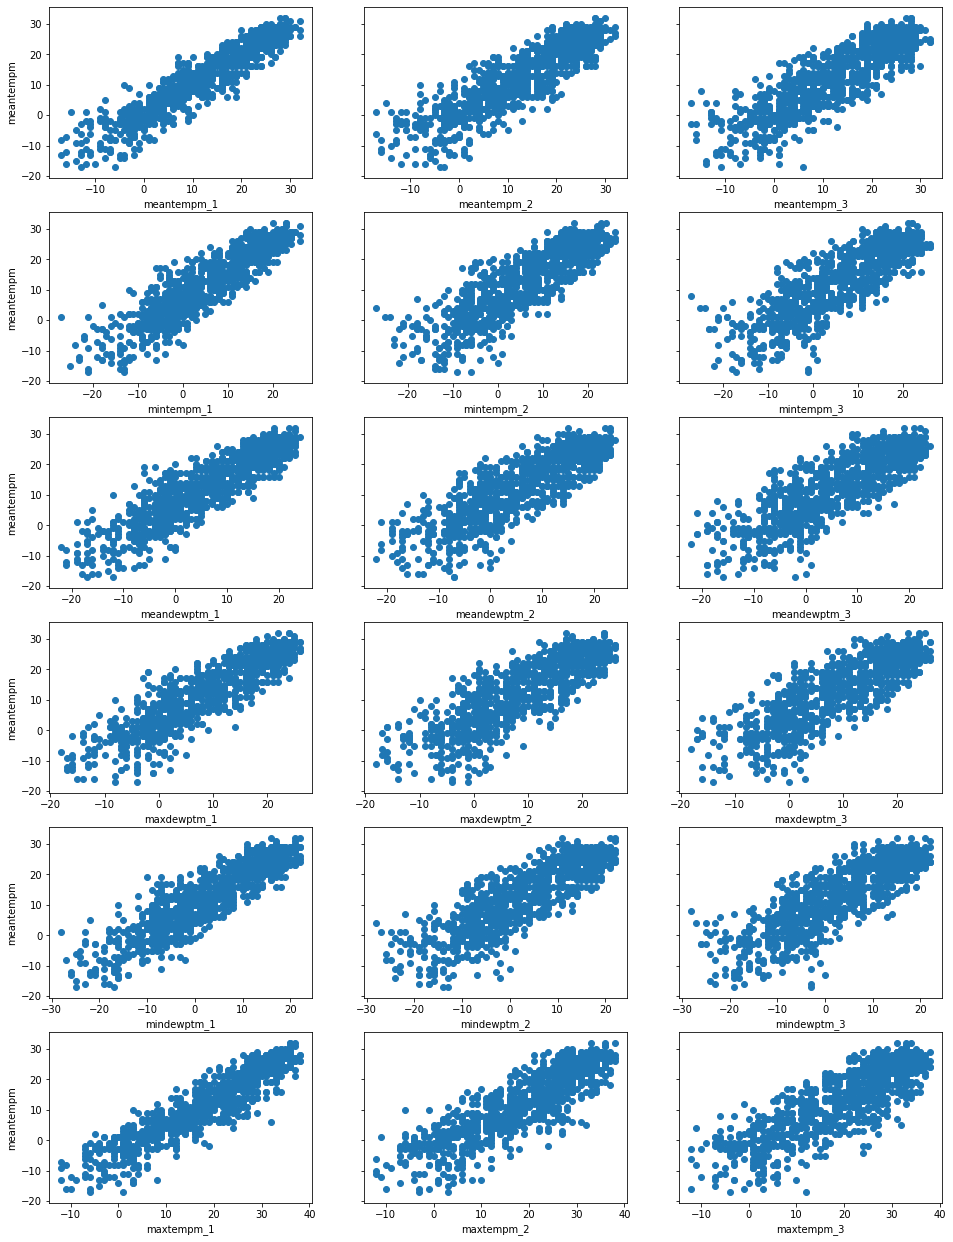

In [5]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['meantempm'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='meantempm')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

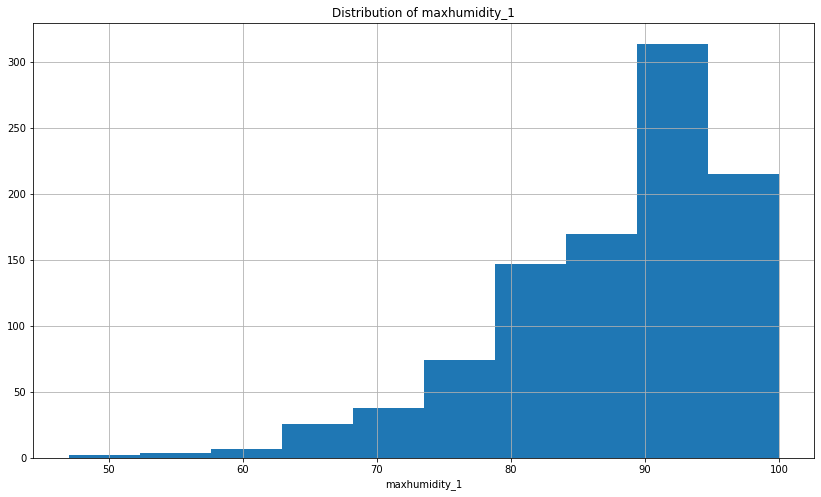

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df.maxhumidity_1.hist()
plt.title('Distribution of maxhumidity_1')
plt.xlabel('maxhumidity_1')
plt.show()

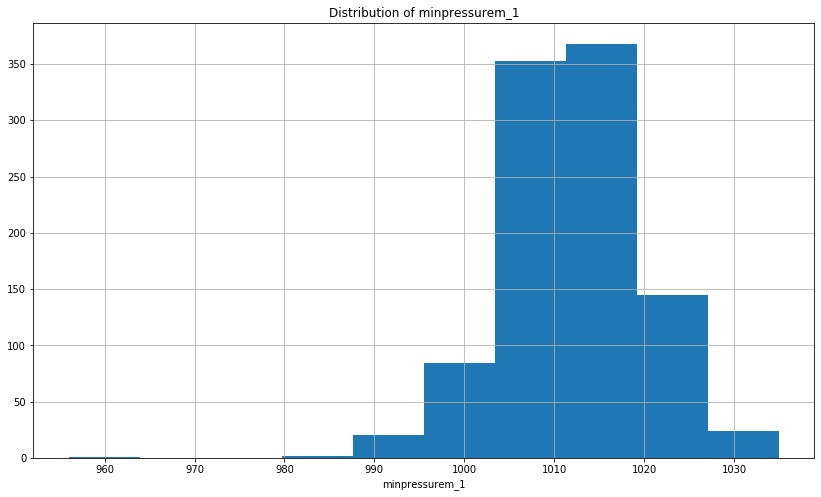

In [9]:
df.minpressurem_1.hist()
plt.title('Distribution of minpressurem_1')
plt.xlabel('minpressurem_1')
plt.show()

In [11]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     462.7
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:03:06   Log-Likelihood:                -2679.2
No. Observations:                 997   AIC:                             5396.
Df Residuals:                     978   BIC:                             5490.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0769      0.526      2.049      0.041       0.046       2.108
meantempm_1      0.1047      0.287      0.364      0.716      -0.459       0.669
meantempm_2      0.3512      0.287      1.225      0.221      -0.211       0.914
meantempm_3     -0.1084      0.286     -0.379      0.705      -0.669       0.453
mintempm_1       0.0805      0.149      0.539      0.590      -0.213       0.373
mintempm_2      -0.2371      0.149     -1.587      0.113      -0.530       0.056
mintempm_3       0.1521      0.148      1.028      0.304      -0.138       0.443
meandewptm_1    -0.0418      0.138     -0.304      0.761      -0.312       0.228
meandewptm_2    -0.0121      0.138     -0.088      0.930      -0.282       0.258
meandewptm_3    -0.0060      0.137     -0.044      0.965      -0.275       0.263
maxdewptm_1     -0.1592      0.091     -1.756      0.079      -0.337       0.019
maxdewptm_2     -0.0113      0.091     -0.125      0.900      -0.189       0.166
maxdewptm_3      0.1326      0.089      1.492      0.136      -0.042       0.307
mindewptm_1      0.3638      0.084      4.346      0.000       0.200       0.528
mindewptm_2     -0.0119      0.088     -0.136      0.892      -0.184       0.160
mindewptm_3     -0.0239      0.086     -0.279      0.780      -0.192       0.144
maxtempm_1       0.5042      0.147      3.438      0.001       0.216       0.792
maxtempm_2      -0.2154      0.147     -1.464      0.143      -0.504       0.073
maxtempm_3       0.0809      0.146      0.555      0.579      -0.205       0.367
==============================================================================
Omnibus:                       13.252   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.097
Skew:                          -0.163   Prob(JB):                     0.000194
Kurtosis:                       3.552   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that meandewptm_3 has the greatest p-value and that it is
#             greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('meandewptm_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     490.4
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:53:44   Log-Likelihood:                -2679.2
No. Observations:                 997   AIC:                             5394.
Df Residuals:                     979   BIC:                             5483.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0771      0.525      2.051      0.041       0.046       2.108
meantempm_1      0.1040      0.287      0.363      0.717      -0.459       0.667
meantempm_2      0.3513      0.286      1.226      0.220      -0.211       0.913
meantempm_3     -0.1082      0.286     -0.379      0.705      -0.669       0.452
mintempm_1       0.0809      0.149      0.543      0.587      -0.211       0.373
mintempm_2      -0.2371      0.149     -1.588      0.113      -0.530       0.056
mintempm_3       0.1520      0.148      1.028      0.304      -0.138       0.442
meandewptm_1    -0.0419      0.137     -0.305      0.761      -0.312       0.228
meandewptm_2    -0.0121      0.138     -0.088      0.930      -0.282       0.258
maxdewptm_1     -0.1592      0.091     -1.757      0.079      -0.337       0.019
maxdewptm_2     -0.0115      0.090     -0.127      0.899      -0.189       0.166
maxdewptm_3      0.1293      0.048      2.705      0.007       0.036       0.223
mindewptm_1      0.3638      0.084      4.349      0.000       0.200       0.528
mindewptm_2     -0.0119      0.088     -0.135      0.892      -0.184       0.160
mindewptm_3     -0.0266      0.058     -0.456      0.648      -0.141       0.088
maxtempm_1       0.5046      0.146      3.448      0.001       0.217       0.792
maxtempm_2      -0.2154      0.147     -1.465      0.143      -0.504       0.073
maxtempm_3       0.0809      0.146      0.556      0.579      -0.205       0.367
==============================================================================
Omnibus:                       13.254   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.105
Skew:                          -0.163   Prob(JB):                     0.000193
Kurtosis:                       3.553   Cond. No.                         286.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = X[['const','mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1', 'maxdewptm_3', 'mindewptm_1', 'maxtempm_1']]

In [13]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              meantempm   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1196.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:04:33   Log-Likelihood:                -2681.7
No. Observations:                 997   AIC:                             5379.
Df Residuals:                     989   BIC:                             5419.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1534      0.411      2.804      0.005       0.346       1.961
mintempm_1      0.1310      0.053      2.458      0.014       0.026       0.236
mintempm_2     -0.0964      0.037     -2.620      0.009      -0.169      -0.024
mintempm_3      0.0886      0.041      2.183      0.029       0.009       0.168
maxdewptm_1    -0.1939      0.047     -4.117      0.000      -0.286      -0.101
maxdewptm_3     0.1269      0.040      3.191      0.001       0.049       0.205
mindewptm_1     0.3352      0.051      6.605      0.000       0.236       0.435
maxtempm_1      0.5506      0.024     22.507      0.000       0.503       0.599
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.871
Skew:                          -0.163   Prob(JB):                     0.000217
Kurtosis:                       3.548   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degress celcius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celcius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.90
The Mean Absolute Error: 2.69 degress celcius
The Median Absolute Error: 2.17 degrees celcius
